# PERBAIKAN UTS Computer Vision, Mei 2022

## Pertama-tama, ganti NIM di nama file ini. Klik <font color="red">File -> Rename... </font>

Lalu isi yang di bawah ini. Untuk mengedit cell ini, double-click di sini.
### NAMA: Yusuf Tis'a Doni
### NIM: A710190084

**CPMK**. Sesudah mengikuti dengan penuh matakuliah ini, mahasiswa diharapkan mampu:
1. Mendemonstrasikan pemahaman konstruksi gambar grayscale, warna, dan biner.
2. Mendemonstrasikan pemahaman colorspace RGB dan HSV dan pemanfaatannya di computer vision
3. Memanipulasi gambar secara sederhana


#### Lengkapi kode di bawah dan jalankan


In [1]:
from time import ctime
from os import getcwd
import sys
nama = "Yusuf Tis'a Doni"        ## Ganti dengan namamu
NIM = "A710190084"        ## Ganti dengan NIM-mu
kota = "Surakarta"        ## Ganti dengan kotamu
print("NAMA:", nama)
print("NIM :", NIM)
print("Kota:", kota)
print(ctime())
print("")
print(getcwd())
print(sys.executable)
print(sys.version)

NAMA: Yusuf Tis'a Doni
NIM : A710190084
Kota: Surakarta
Wed Jun 15 11:50:57 2022

C:\Users\dynam\Downloads
C:\Users\dynam\AppData\Local\Programs\Python\Python310\python.exe
3.10.4 (tags/v3.10.4:9d38120, Mar 23 2022, 23:13:41) [MSC v.1929 64 bit (AMD64)]


##  Importing the libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image, Markdown

In [3]:
Markdown('<br><br><br><br><div align="center"><font size="7">{}</font></div><br><br>'.format(chr(65021) ) )

<br><br><br><br><div align="center"><font size="7">﷽</font></div><br><br>

# 1 

#### Score: 10, CPMK: 1
Tampilkan file `hpinus.jpg` dengan perintah `Image()` dan perintah `plt.imshow()` pastikan keduanya menampilkan gambar yang sama dengan pewarnaan yang sama. Gambar hutan pinus di yogyakarta yang adem.

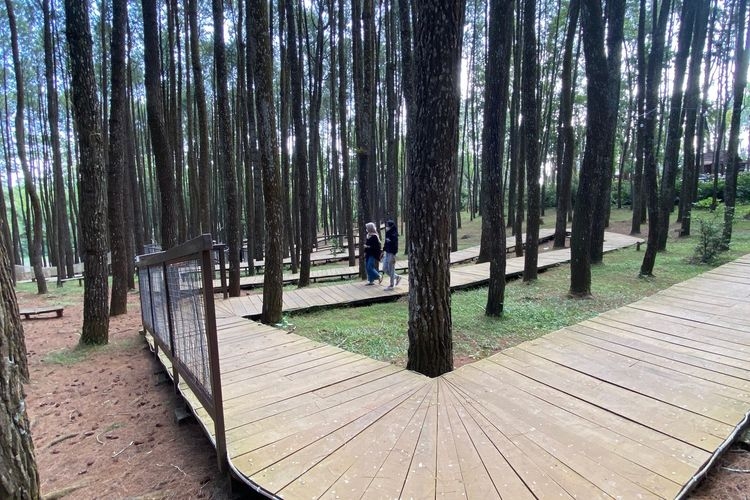

In [4]:
#Menampilkan gambar dengan perintah Image()
Image(filename='hpinus.jpg') 

(500, 750, 3)


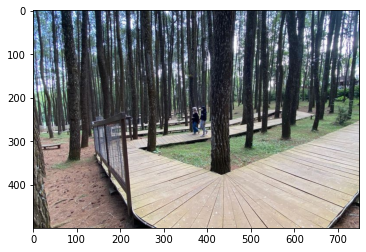

In [5]:
# Menampilkan gambar menggunakan perintah plt.imshow

# panggil gambar
hPinus = cv2.imread("hpinus.jpg")
# ubah channel dari BGR ke RGB
hPinusOk = cv2.cvtColor(hPinus, cv2.COLOR_BGR2RGB)
# tampilkan gambar
plt.imshow(hPinusOk)
# tampilkan shape (tinggi, lebar, channel)
print(hPinusOk.shape)

#### Pertanyaan:
Apa beda dua perintah itu? Mengapa perlu slicing pada yang kedua?

#### Jawaban:
Perintah Image() akan menampilkan gambar sesuai dengan ukuran aslinya, sedangkan perintah perintah plt.imshow merupakan fungsi dari modul matplotlib dan harus dibaca terlebih daulu menggunakan fungsi cv2.imread kemudian dimasukkan kedalam variabel. 

Kemudian ubah terlebih dahulu channel warna menggunakan fungsi cv2.cvtColor(hPinus, cv2.COLOR_BGR2RGB) untuk mengubah channel warna BGR menjadi RGB, karena gambar yang dibaca menggunakan cv2 maka warna akan channel warna nya menjadi BGR. Selanjutnya menampilkan gambar menggunakan fungsi cv2.imshow()  

# 2

#### Score: 10, CPMK: 1,2

Ada tiga citra grayscale di folder ini: `Q.png`, `S.png`, dan `T.png`. Mohon di-merge agar menjadi citra tunggal yang berwarna. Warna harus natural dan tepat (langit harus biru, hutan hijau, dll).

Tampilkan ketiga gambar itu, lalu tampilkan hasil merge-nya. Gambar menunjukkan Tawangmangu yang sejuk.

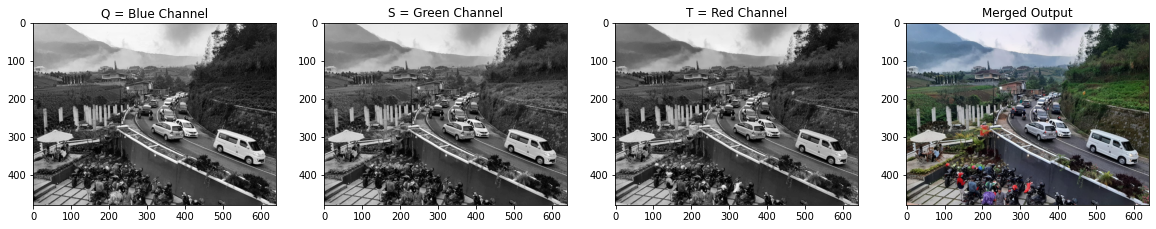

In [6]:
# Baca 3 citra grayscale Q.png, S.png dan T.png
Q = cv2.imread("Q.png", cv2.IMREAD_GRAYSCALE)
S = cv2.imread("S.png", cv2.IMREAD_GRAYSCALE)
T = cv2.imread("T.png", cv2.IMREAD_GRAYSCALE)

# Menampilkan tiap-tiap citra grayscale
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(Q, cmap='gray');plt.title("Q = Blue Channel");
plt.subplot(142);plt.imshow(S, cmap='gray');plt.title("S = Green Channel");
plt.subplot(143);plt.imshow(T, cmap='gray');plt.title("T = Red Channel");

# merge 3 citra grayscale
tw = cv2.merge((Q, S, T))
# Menampilkan hasil merge dari 3 citra grayscale
plt.subplot(144);plt.imshow(tw[:,:,::-1]);plt.title("Merged Output");

#### Jawab yang berikut:
Red channel adalah (Q atau S atau T?): T

Green channel adalah: S

Blue channel adalah: Q

# 3
#### Score: 10, CPMK: 1, 2
Rupanya ada yang menyimpan gambar dengan terbalik-balik channel-nya. Coba buka `r4_tertukar_channel.jpg`. 

Tolong diperbaiki ya, lalu di-save sebagai `r4.jpg`. Dampingkan kedua gambar. Gambar akan menunjukkan Raja Ampat yang eksotik. Buka pula gambar yang sudah jadi dengan perintah `Image("r4.jpg")`

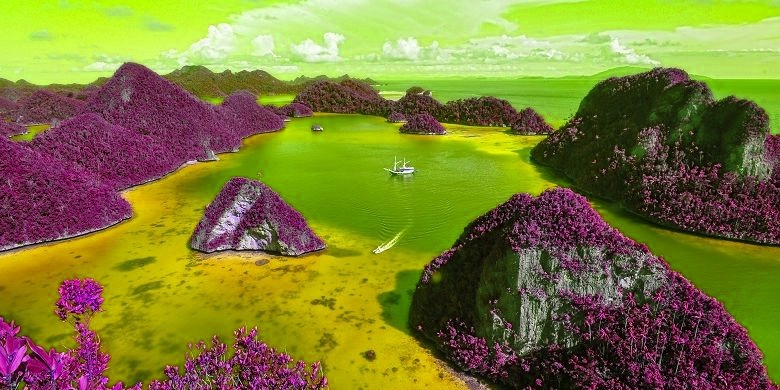

In [7]:
# Menampilkan gambar asli dengan perintah Image()
Image("r4_tertukar_channel.jpg")

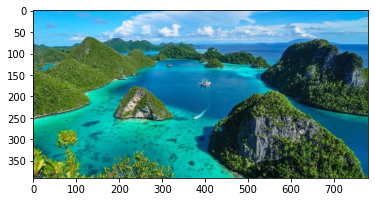

In [8]:
# panggil gambar dengan perintah imread
r_terbalik = cv2.imread("r4_tertukar_channel.jpg")

# pisah channel warna pada gambar
FU = r_terbalik[:,:,0]
FA = r_terbalik[:,:,1]
FI = r_terbalik[:,:,2]

# merge / gabungkan 3 gambar channel yang dipisah, dan diurutkan menjadi benar
r4 = cv2.merge([FA,FI,FU])

plt.imshow(r4[:,:,::-1])

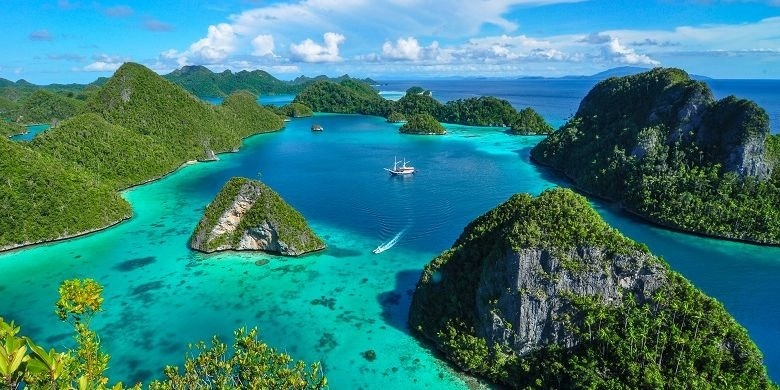

In [9]:
# Menyimpan gambar menggunkan perintah imwrite
cv2.imwrite("r4.jpg", r4)
Image("r4.jpg")

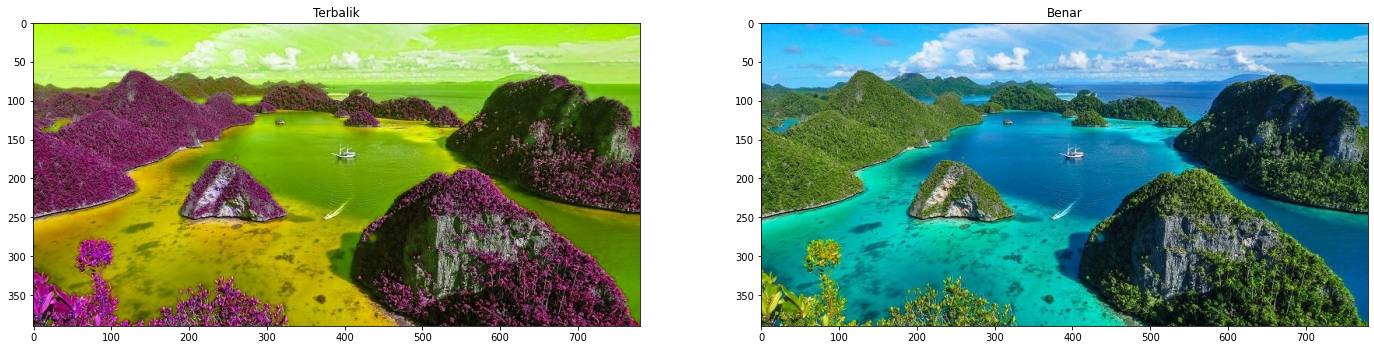

In [10]:
# menyandingkan 2 gambar raja ampat dengan channel warna terbalik dan sudah benar
plt.figure(figsize=[50,10])
plt.subplot(141);plt.imshow(r_terbalik[:,:,::-1]);plt.title("Terbalik");
plt.subplot(142);plt.imshow(r4[:,:,::-1]);plt.title("Benar");

# 4

#### Score: 10, CPMK: 1, 2

Gambar `aab_n.jpg` adalah gambar negative. Pixel (di semua channel) yang tadinya bernilai 255 jadi 0, yang tadinya 0 jadi 255. Yang tadinya bernilai 10, jadi bernilai 245 (yakni 255-10). Yang tadinya bernilai 240, jadi bernilai 15 (yakni 255-240). Yang hitam jadi putih, yang putih jadi hitam. Dan sebagainya.

Ubahlah agar menjadi gambar yang positive. Save menjadi `aab_positive.jpg`, yang menggambarkan Alun-alun Bandung yang ramah dan positif!

Kamu hanya perlu satu baris perintah untuk membaliknya.



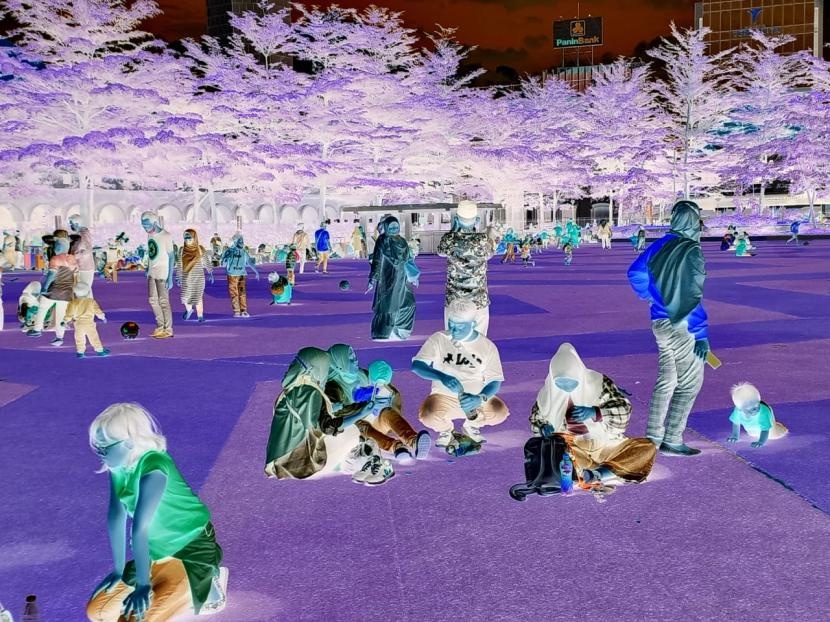

In [11]:
# menampilkan gambar aab_n.jpg dengan ukuran asli
Image('aab_n.jpg')

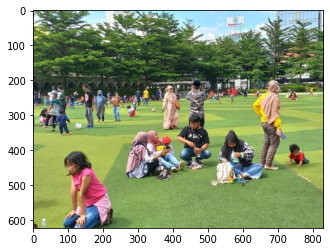

In [12]:
# membaca gambar dengan menggunakan perintah cv2.imread dan simpan pada variabel
bandung_n = cv2.imread('aab_n.jpg')
# memperbaiki channel warna negativ dengan cara  255 dikurangi dengan nilai tiap-tiap channel pada gambar
bandung_p = 255 - bandung_n

plt.imshow(bandung_p[:,:,::-1])

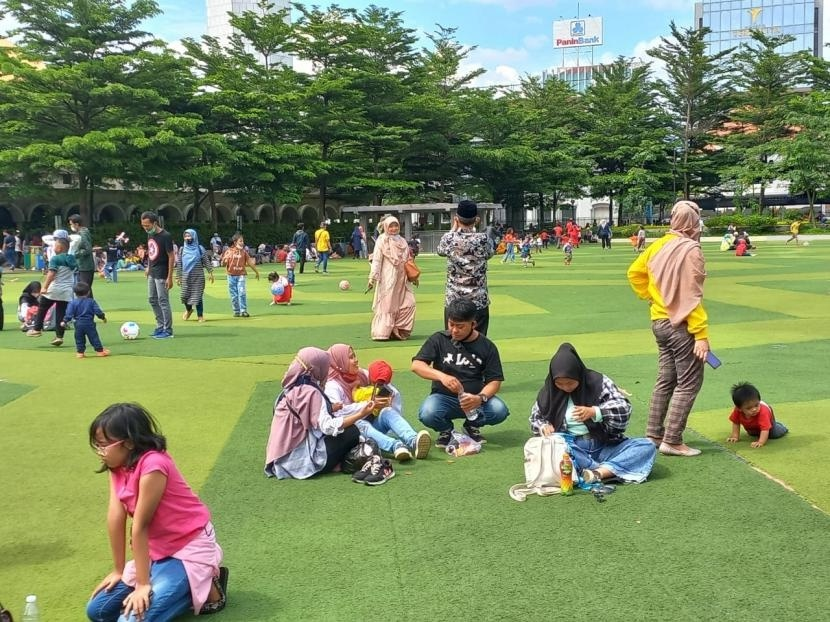

In [13]:
cv2.imwrite('aab_positive.jpg',bandung_p)
Image('aab_positive.jpg')

# 5


#### Score: 10, CPMK: 3

Pada gambar sebuah jalan di Tawangmangu di atas, tutuplah mobil putih paling depan (di sisi kanan bawah) dengan kotak warna Tosca. 

Warna "Tosca" dapat dicari di internet.


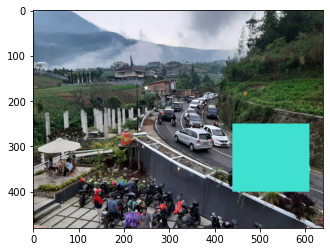

In [14]:
# copy gambar tawangmangu dan simpan pada variabel kotak
kotak = tw.copy()
# memberikan objek kotak pada gambar, menentukan posisi kotak dan warna objek kotak
kotak[250:400,440:610] = 208, 224, 64
# tampilkan gambar dengan perintah plt.imshow
plt.imshow(kotak[:,:,::-1])

# 6

#### Score: 10, CPMK: 3

Pada gambar hutan pinus yogyakarta di atas, berilah kotak kuning pada dua orang yang sedang berjalan-jalan di situ. Beri keterangan di bawahnya, misal "dua orang sedang berjalan-jalan".

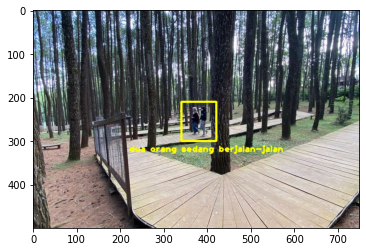

In [15]:
# copy gambar pinus simpan pada variabel pinus_kotak
pinus_kotak = hPinus.copy()

# memberikan objek kotak dengan menggunakan perintah cv2.rectangle
cv2.rectangle(pinus_kotak, (340, 210), (420,300), (0, 255, 255), thickness=4);

# memberikan text pada gambar  dengan menggunakan perintah cv2.putText
textOrang = "dua orang sedang berjalan-jalan"
cv2.putText(pinus_kotak, textOrang, (220, 325), 1, 1.3, (0,255, 255), 2, cv2.LINE_AA);

# menampilkan gambar menggunakan perintah plt.imshow
plt.imshow(pinus_kotak[:,:,::-1])

# 7

#### Score: 10, CPMK: 3

Pada gambar `tomat_jeruk.jpg`, buatlah sebuah filter untuk menangkap tomat-nya saja. Tentunya akan lebih mudah kalau kamu membuka dengan colorspace HSV.

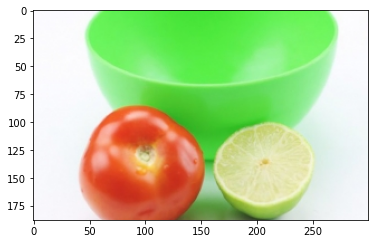

In [16]:
# membaca gambar tomat_jeruk.jpg menggunakan perintah cv2.imread dan simpan pada variabel tj_img
tj_img = cv2.imread("tomat_jeruk.jpg",cv2.IMREAD_COLOR)

# balik channel warna gambar
tj_channels_reversed = tj_img[:,:,::-1]

# tampilkan gambar menggunakan imshow
plt.imshow(tj_channels_reversed)

In [17]:
# Mengubah channel warna ke HSV
hsv_tj = cv2.cvtColor(tj_channels_reversed, cv2.COLOR_RGB2HSV)

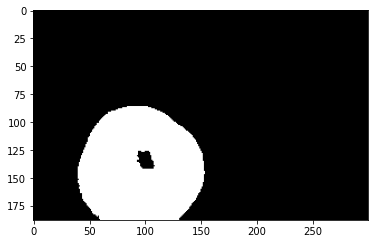

In [18]:
# Mengambil range chanel warna merah
merah_bawah = np.array([0,10,0])
merah_atas = np.array([20,255,255])
mask1 = cv2.inRange(hsv_tj,merah_bawah,merah_atas)

# Tampilkan hasil mask
plt.imshow(mask1,cmap="gray")

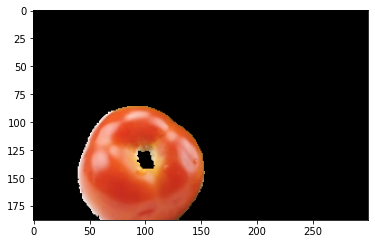

In [19]:
# bitwise gambar
res = cv2.bitwise_and(tj_channels_reversed, tj_channels_reversed, mask=mask1)

#tampilkan gambar hasil bitwise
plt.imshow(res)

#### Pertanyaan:
Mengapa untuk tugas semacam ini, colorspace HSV lebih cocok daripada colorspace RGB (atau BGR)?
#### Jawaban:
Karena untuk menangkap channel warna yang diinginkan lebih detail, tidak hanya warna. tapi juga saturasi, level, dan hue. Jadi bisa dilihat tomat yang bisa ditangkap lebih detail tidak hanya flat warna merah saja.  

# 8


#### Score: 15, CPMK: 3

Pada gambar hutan pinus di atas, beri judul transparent dengan file dari `hpkuning.jpg`. Kamu harus membalik tulisannya agar tegak dan terbaca kiri ke kanan dengan jelas!

Campur (*blend*) kedua gambar di atas dengan ketentuan:
- Gambar hutan pinus bobot 1
- Gambar tulisan kuning bobot 0.3, tulisan kuning akan terlihat samar. 
  - Ketentuan letak: pojok tulisan kiri atas bergabung di pixel (40, 40) gambar utama, dan berakhir 40 pixel dari kanan. Tulisan akan tampak simetris di tengah-atas. Jadi kamu harus menyesuaikan ukurannya. Saat penyesuaian ukuran, aspect ratio tidak boleh berubah.
  

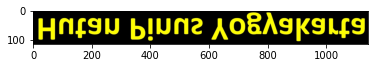

In [20]:
# baca gambar menggunakan perintah cv2.imread
text_pinus = cv2.imread("hp_kuning.jpg",)
# balik channel  warna
text_pinus_ok = text_pinus[:,:,::-1]

plt.imshow(text_pinus_ok)

(112, 1143, 3)

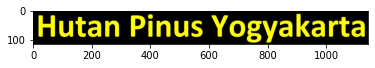

In [21]:
# balik gambar secara vertikal
text_pinus_balik = cv2.flip(text_pinus_ok, 0)

# Tampilkan gambar dengan perintah plt.imshow
plt.imshow(text_pinus_balik)

# Tampilkan ukuran tinggi, lebar, dan jumlah channel warna dengan perintah shape
text_pinus_balik.shape

In [22]:
# me-resize ukuran gambar text
text_res = cv2.resize(text_pinus_balik,None,fx=0.586, fy=0.586)
text_res.shape

(66, 670, 3)

(500, 750, 3)

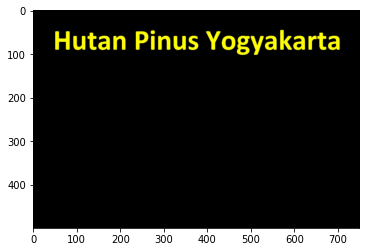

In [23]:
# membuat layer kosong dengan ukuran yang sama dengan gambar hutan pinus
layer_pinus = np.zeros(hPinus.shape, dtype=np.uint8)

# menentukan posisi gambar text
top_left_text = np.array([40,40], dtype=np.uint8)

# menggabungkan gambar text dengan layer kosong
layer_pinus[top_left_text[0]:top_left_text[0]+text_res.shape[0], top_left_text[1]:top_left_text[1]+text_res.shape[1]] = text_res

#tampilkan gambar
plt.imshow(layer_pinus)
layer_pinus.shape

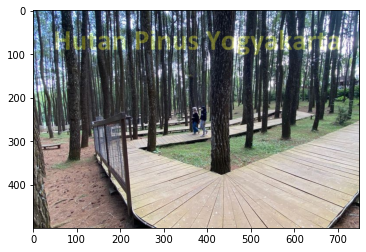

In [24]:
gabung =  cv2.addWeighted(hPinus, 1, layer_pinus[:,:,::-1], 0.3, 0)
plt.imshow(gabung[:,:,::-1])

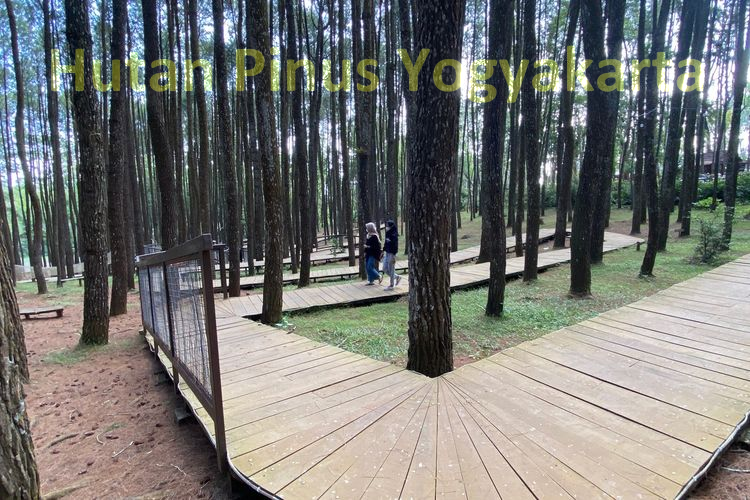

In [25]:
cv2.imwrite('pinus_text_kuning.png', gabung)
Image('pinus_text_kuning.png')

In [26]:
670/1143

0.5861767279090113

# 9


#### Score: 15, CPMK: 3

Masih dengan gambar hutan pinus, buatlah gambar hutan pinus itu sebagai background. Buka gambar `pti_2022.png`. Putar dan cerminkan, jadikan tulisan kuningnya menjadi "bolong". 

Tempelkan tulisan yang bolong itu ke gambar utama, sehingga sebagian hutan pinus terlihat lewat out-line tulisan.  Buat agar ukuran tulisan bisa fit ke gambar hutan pinus, dengan tidak mengorbankan aspect ratio. Kemungkinan akan ada strip sisa gambar atas dan bawah. Buat agar simetris. Strip atas dan bawah "tembus pandang", terlihat hutan pinus-nya.

Prosesnya secara umum mirip seperti di bawah ini.

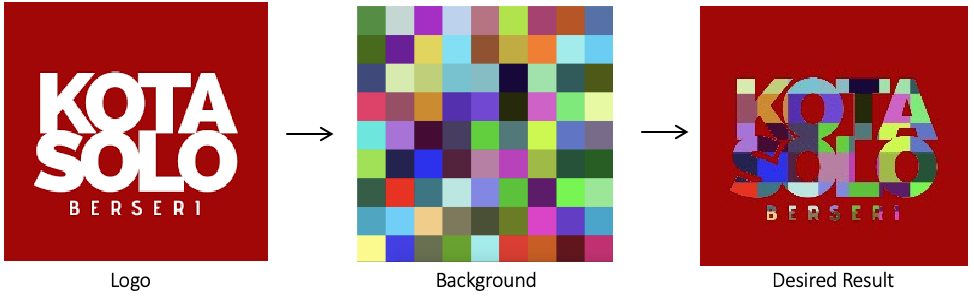

In [27]:
Image("Logo_Manipulation.png")

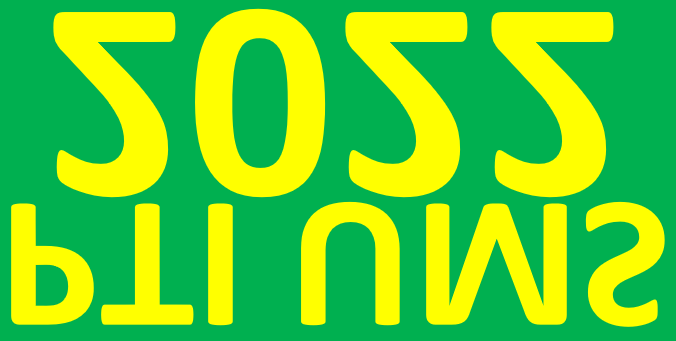

In [28]:
# menampilkan gambar PTI_2022 dengan perintah Image
Image('PTI_2022.png') 

(341, 676, 3)

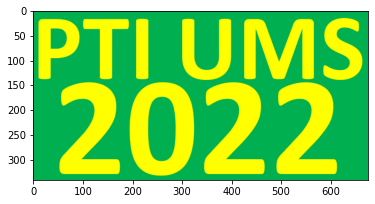

In [29]:
# membaca gambar dengan perintan imread
text_pti = cv2.imread("PTI_2022.png")
# membalik gambar dengan perintah cv2.flip
text_pti_ok = cv2.flip(text_pti, 0)

plt.imshow(text_pti_ok[:,:,::-1])

logo_w = text_pti_ok.shape[0]
logo_h = text_pti_ok.shape[1]

text_pti_ok.shape

(500, 750, 3)


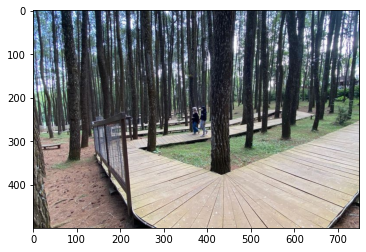

In [30]:
# gambar pinus
plt.imshow(hPinus[:,:,::-1])
print(hPinus.shape)

In [31]:
# me resize ukuran gambar text_pti_ok agar panjang sesuai dengan gambar pinus
pti_res = cv2.resize(text_pti_ok,None,fx=1.11, fy=1.11)
pti_res.shape

(379, 750, 3)

(379, 750)


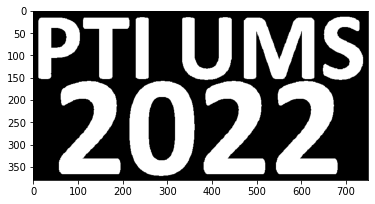

In [32]:
# membuat gambar text pti menjadi grayscale
img_gray = cv2.cvtColor(pti_res, cv2.COLOR_RGB2GRAY)
retval, img_mask = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

plt.imshow(img_mask,cmap="gray")
print(img_mask.shape)

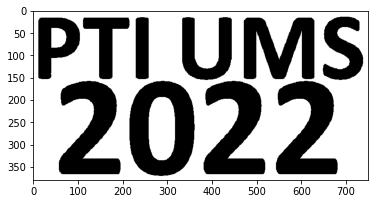

In [33]:
img_mask_inv = cv2.bitwise_not(img_mask)

plt.imshow(img_mask_inv, cmap="gray")

In [34]:
pn_mid = hPinus[60:500-61,:,:]
pn_mid.shape

(379, 750, 3)

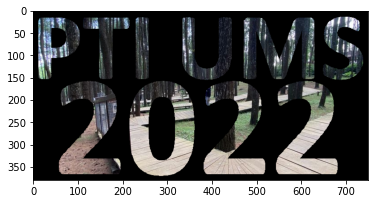

In [35]:
img_background = cv2.bitwise_and(pn_mid, pn_mid, mask=img_mask)
plt.imshow(img_background[:,:,::-1])

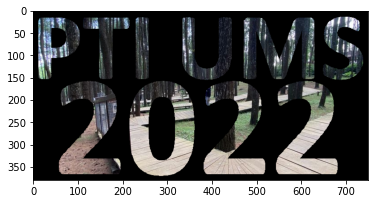

In [36]:
img_foreground = cv2.bitwise_and(pti_res, pti_res, mask=img_mask_inv)

plt.imshow(img_background[:,:,::-1])

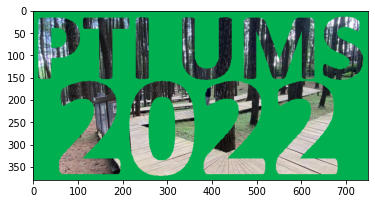

In [37]:
r1 = cv2.add(img_background,img_foreground)
plt.imshow(r1[:,:,::-1])

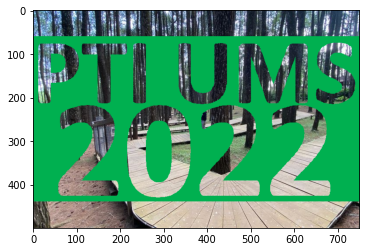

In [39]:
result = np.concatenate( ( hPinus[0:60,:,:], r1, hPinus[500-61:,:,:]))

plt.imshow(result[:,:,::-1])

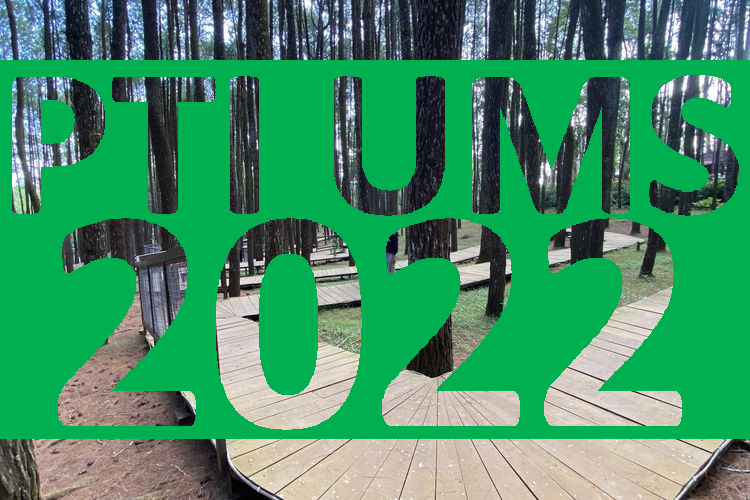

In [40]:
cv2.imwrite('pinus_pti.png', result)
Image('pinus_pti.png')

In [34]:
750/676

1.1094674556213018

##### ----- Akhir Perbaikan UTS

**PUSH to GitHub**